# Proyek Analisis Data: Bike Sharing
- **Nama:** Syahfrizka Dyah Nazwa Umbara
- **Email:** nazwaumbara@gmail.com
- **ID Dicoding:** nazwaumbara

## Menentukan Pertanyaan Bisnis

1. At what times are bike rentals the highest during non-working days?
2. How does the season affect the number of casual users?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plot
import scipy
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
bike_hour = pd.read_csv("E:/analisis_data/data/hour.csv")

**Insight:**
- The dataset bike_hour is successfully imported from the specified CSV file. 

### Assessing Data

In [3]:
print(bike_hour.duplicated().sum())
print(bike_hour.isnull().sum())

0
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- The assessment confirms that there are no missing values or duplicated data in the dataset

### Cleaning Data

In [4]:
column_mapping = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total', 'hr': 'hour'}

bike_hour.rename(columns=column_mapping, inplace=True)
bike_hour.head()

,instant,date,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("Number of Duplicates: ", bike_hour.duplicated().sum())
bike_hour.drop_duplicates(inplace=True)
bike_hour['date'] = pd.to_datetime(bike_hour['date'])
bike_hour.info()

Number of Duplicates:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null 

**Insight:**
- **Date Conversion:** The 'date' column is converted to a datetime format, enabling more effective time-based analysis. This conversion allows for operations such as filtering by date, grouping by month, or extracting day-of-week information, which are essential for understanding patterns in bike rentals over time.

In [6]:
bike_hour['season'] = bike_hour['season'].astype('category')
bike_hour['season'] = bike_hour['season'].cat.rename_categories({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_hour['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

**Insight:**
- **Data Clarity:** By converting the 'season' column into a categorical data type, it enhances the clarity of the dataset. This change improves performance during analysis and enables better interpretation of seasonal effects on bike rentals.

## Exploratory Data Analysis (EDA)

### Explore
- **Heatmap:** Persewaan Sepeda Berdasarkan Jam dan Hari
- **Regplot:** Dampak Kelembapan terhadap Persewaan Sepeda Kasual di Musim Dingin

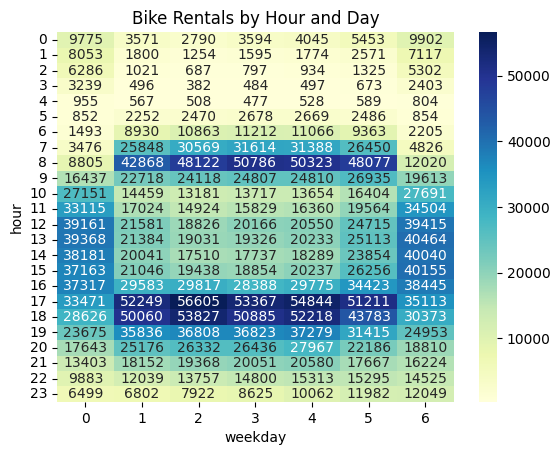

In [7]:
pivot_table = bike_hour.pivot_table(values='total', index='hour', columns='weekday', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plot.title('Bike Rentals by Hour and Day')
plot.show()

**Insight:**
- **Peak Rental Hours:** The darkest cells indicate peak rental hours. Users tend to rent bikes more frequently during specific hours, which may vary by weekday. This information can guide staffing and bike availability during high-demand periods.

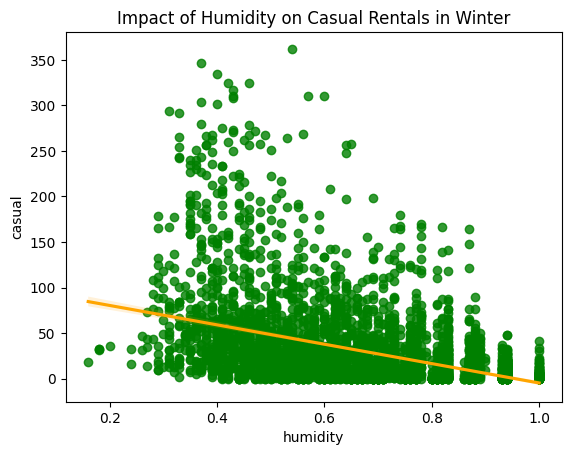

In [8]:
humidity_df = bike_hour[bike_hour['season'] == 'winter']
sns.regplot(x='humidity', y='casual', data=humidity_df, scatter_kws={'color':'green'}, line_kws={'color':'orange'})
plot.title('Impact of Humidity on Casual Rentals in Winter')
plot.show()

**Insight:**

- **Negative Correlation:** If the regression line slopes downward, it indicates a negative correlation, suggesting that higher humidity levels may lead to a decrease in casual rentals. This could be due to discomfort or reduced motivation to bike in damp conditions.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

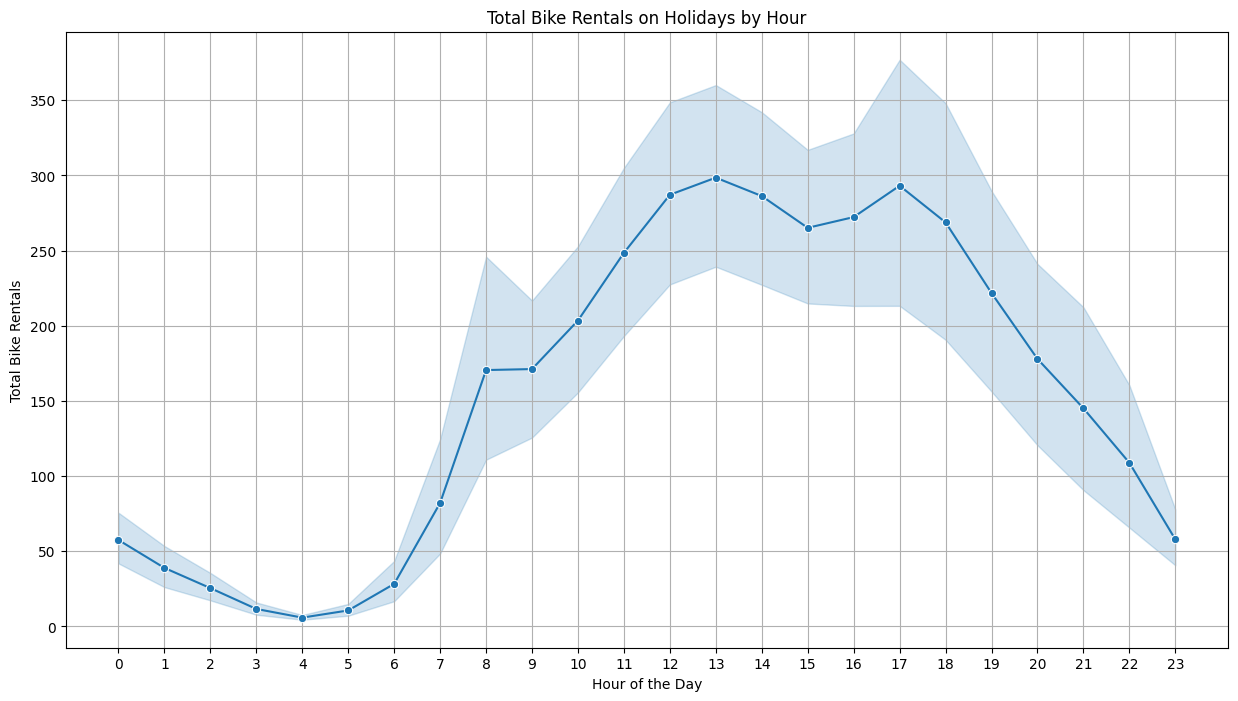

In [9]:
non_working_days = bike_hour[bike_hour['holiday'] == 1]

plot.figure(figsize=(15, 8))
sns.lineplot(data=non_working_days, x='hour', y='total', marker='o')
plot.title('Total Bike Rentals on Holidays by Hour')
plot.xlabel('Hour of the Day')
plot.ylabel('Total Bike Rentals')
plot.xticks(range(0, 24))  
plot.grid(True)
plot.show()

**Insight**
- **Peak Rentals at Specific Times:** Total bike rentals significantly increase on holidays, particularly after 10 a.m., indicating that users prefer to bike during their leisure time for recreation and exercise.

### Pertanyaan 2:

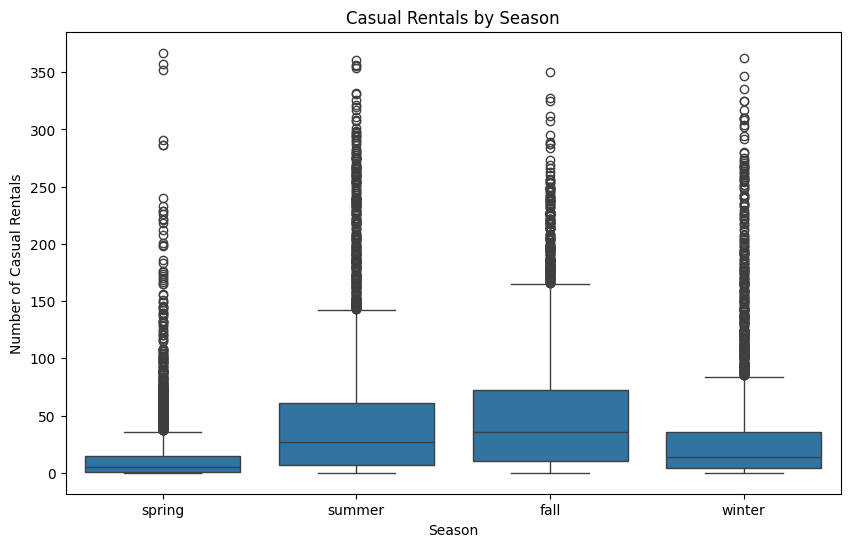

In [10]:
plot.figure(figsize=(10, 6))
df_season = bike_hour[['season', 'casual']]
melted_df_season = pd.melt(df_season, id_vars='season', value_name='casual_rentals')
sns.boxplot(data=melted_df_season, x='season', y='casual_rentals')
plot.title('Casual Rentals by Season')
plot.xlabel('Season')
plot.ylabel('Number of Casual Rentals')
plot.show()

**Insight:**
- **Casual Rentals Vary by Season:** The boxplot shows significant variations in casual bike rentals across seasons, with the highest rentals in summer and the lowest in winter, indicating that weather influences users' interest in biking.

## Analisis Lanjutan (Opsional)

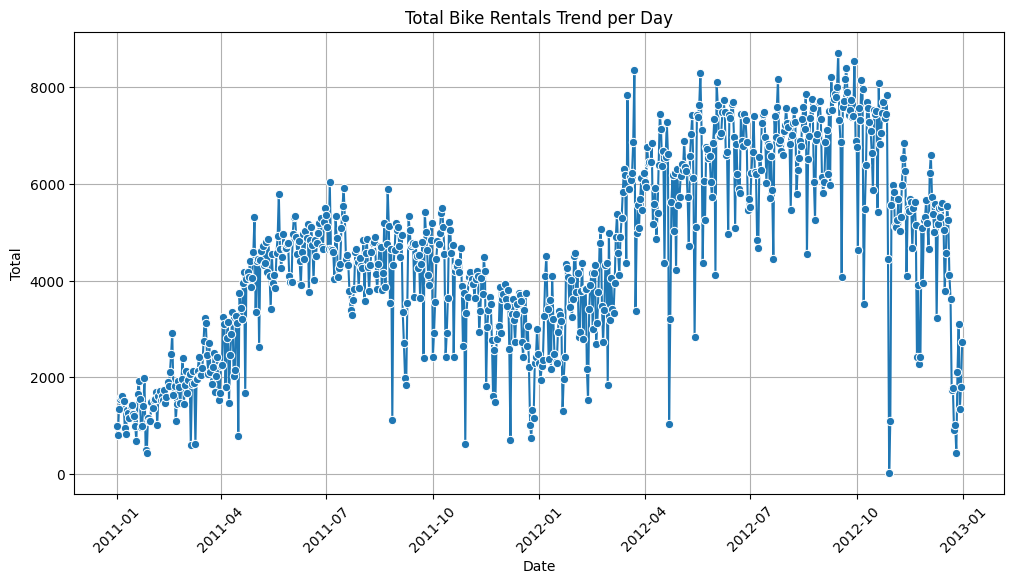

In [11]:
daily_total = bike_hour.groupby('date')['total'].sum().reset_index()

plot.figure(figsize=(12, 6))
sns.lineplot(data=daily_total, x='date', y='total', marker='o')
plot.title('Total Bike Rentals Trend per Day')
plot.xlabel('Date')
plot.ylabel('Total')
plot.xticks(rotation=45)
plot.grid(True)
plot.show()

## Conclusion

**Conclusion and Recommendations:**
- **Highest Bike Rentals on Non-Working Days:**
The visualization shows that the total bike rentals on holidays peak at certain times during the day, especially after 10 a.m. This indicates that many users choose to ride bikes during these times, likely for recreation and outdoor activities after busy hours.

- **Seasonal Impact on Casual Users:**
The boxplot demonstrates the variation in casual rentals based on the season. It can be observed that casual users tend to be more numerous in the summer, while rentals decline in the winter. This indicates that temperature and weather significantly influence biking habits.

- **Recommendation:**
To meet the high demand during peak hours on holidays, it is recommended to provide more bikes, especially in popular locations such as parks or recreational areas.